In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
import keras

# 1. Ładowanie i przetwarzanie danych wejściowych

In [3]:
# Funkcja służąca do wczytania danych z wybranego pliku
def load_data_from_file(file_name):
    # Ładujemy nasze dane z repozytorium na GitHub
    data = pd.read_csv('https://raw.githubusercontent.com/nerooc/device-downtime-detection/main/data/{0}'.format(file_name), header=None).to_numpy()
    
    # Nie potrzebujemy indeksów 1, 2, 3, 4... itp., więc usuwamy pierwszą kolumnę
    COLUMNWISE = 1
    data = np.delete(data, obj=0, axis=COLUMNWISE)

    return data

# Funkcja służąca do wczytania wszystkich danych
def load_all_data(num_of_iters):
  # W tej liście przechowywać będziemy wszystkie dane z urządzenia
  data_blocks = []

  # Manipulacja danymi, żeby w każdej iteracji wczytać dane zarówno z pliku normal
  # jak i z pliku fault
  for i in range(num_of_iters):
    file_index = i + 1
    file_name_normal = f'data{file_index}_normal.csv'
    file_name_fault = f'data{file_index}_fault.csv'

    print(file_name_fault)

    # Dodatkowe wskazanie, że to odczyt dla działającego urządzenia (1)
    normal_data_block = [load_data_from_file(file_name_normal), 1]
    # Dodatkowe wskazanie, że to odczyt dla niedziałającego urządzenia (0)
    fault_data_block = [load_data_from_file(file_name_fault), 0]

    # Dodajemy te pakiety odczytów w każdej iteracji do wszystkich odczytów
    data_blocks.append(normal_data_block)
    data_blocks.append(fault_data_block)

  return data_blocks

# 2. Statystyki i wizualizacje


In [4]:
# Wczytujemy dane
# Jest 54 dla fault i 53 dla normal, ale wczytamy jedno mniej dla symetrii
data_blocks = load_all_data(num_of_iters=53)
# Dodajmy ostatni blok danych
data_fault_last = pd.read_csv('https://raw.githubusercontent.com/nerooc/device-downtime-detection/main/data/data54_fault.csv', header=None).to_numpy()
# Nie potrzebujemy indeksów 1, 2, 3, 4... itp., więc usuwamy pierwszą kolumnę
COLUMNWISE = 1
data_fault_last = np.delete(data_fault_last, obj=0, axis=COLUMNWISE)
data_blocks.append([data_fault_last, 0])

# Bloki działających urządzeń
working_blocks = [block[0] for block in data_blocks if block[1] == 1]

# Bloki niedziałających urządzeń

faulty_blocks = [block[0] for block in data_blocks if block[1] == 0]

data1_fault.csv
data2_fault.csv
data3_fault.csv
data4_fault.csv
data5_fault.csv
data6_fault.csv
data7_fault.csv
data8_fault.csv
data9_fault.csv
data10_fault.csv
data11_fault.csv
data12_fault.csv
data13_fault.csv
data14_fault.csv
data15_fault.csv
data16_fault.csv
data17_fault.csv
data18_fault.csv
data19_fault.csv
data20_fault.csv
data21_fault.csv
data22_fault.csv
data23_fault.csv
data24_fault.csv
data25_fault.csv
data26_fault.csv
data27_fault.csv
data28_fault.csv
data29_fault.csv
data30_fault.csv
data31_fault.csv
data32_fault.csv
data33_fault.csv
data34_fault.csv
data35_fault.csv
data36_fault.csv
data37_fault.csv
data38_fault.csv
data39_fault.csv
data40_fault.csv
data41_fault.csv
data42_fault.csv
data43_fault.csv
data44_fault.csv
data45_fault.csv
data46_fault.csv
data47_fault.csv
data48_fault.csv
data49_fault.csv
data50_fault.csv
data51_fault.csv
data52_fault.csv
data53_fault.csv


In [5]:
import seaborn as sns

working_blocks_np = working_blocks[0].copy()
faulty_blocks_np = faulty_blocks[0].copy()

for i in range(len(working_blocks) - 1):
  real_index = i + 1
  working_blocks_np = np.concatenate((working_blocks_np, working_blocks[real_index]), axis=0)

for i in range(len(faulty_blocks) - 1):
  real_index = i + 1
  faulty_blocks_np = np.concatenate((faulty_blocks_np, faulty_blocks[real_index]), axis=0)

working_blocks_df = pd.DataFrame(working_blocks_np)
faulty_blocks_df = pd.DataFrame(faulty_blocks_np)

# normalizacja danych
def normalize_data(df):
  for column in df:
    df[column] = df[column] / df[column].max()

  return df

working_blocks_df = normalize_data(working_blocks_df)
faulty_blocks_df = normalize_data(faulty_blocks_df)

# print(working_blocks_df)
# print(faulty_blocks_df)

In [6]:
working_blocks_df.describe()

,0,1,2,3,4,5,6,7,8
count,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000
mean,0.932900,0.677166,0.949002,0.719896,0.467825,0.667167,0.789547,0.903577,0.710817
std,0.023874,0.103450,0.021061,0.108799,0.350635,0.062488,0.152739,0.042812,0.053332
min,0.834356,0.541667,0.912664,0.578947,0.090909,0.577778,0.423077,0.781095,0.646018
25%,0.917178,0.583333,0.934498,0.605263,0.181818,0.622222,0.649725,0.868159,0.676991
50%,0.932515,0.666667,0.938865,0.710526,0.272727,0.655556,0.820055,0.893035,0.703540
75%,0.947853,0.750000,0.969432,0.763158,0.909091,0.688889,0.939560,0.942786,0.734513
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
faulty_blocks_df.describe()

,0,1,2,3,4,5,6,7,8
count,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000
mean,0.893776,0.746380,0.936217,0.780053,0.489139,0.679024,0.769403,0.879467,0.720671
std,0.034907,0.112058,0.032424,0.115168,0.359707,0.048907,0.145890,0.052489,0.040192
min,0.781609,0.520000,0.834061,0.547619,0.090909,0.558140,0.395349,0.712984,0.610619
25%,0.873563,0.680000,0.921397,0.690476,0.181818,0.651163,0.630491,0.840547,0.694690
50%,0.896552,0.760000,0.934498,0.785714,0.363636,0.674419,0.793282,0.879271,0.716814
75%,0.916667,0.800000,0.960699,0.857143,0.909091,0.709302,0.909561,0.920273,0.743363
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


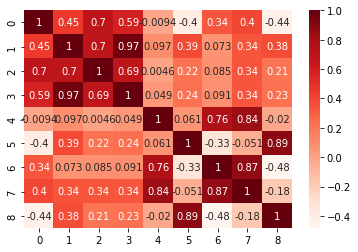

In [8]:
# na podstawie: https://stackoverflow.com/a/66506646
import seaborn as sns
corr = working_blocks_df.corr()
sns.heatmap(corr, cmap="Reds", annot=True)

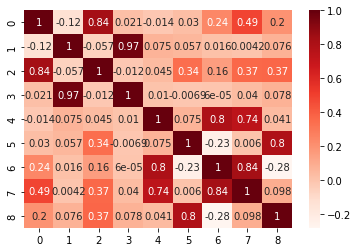

In [9]:
corr = faulty_blocks_df.corr()
sns.heatmap(corr, cmap="Reds", annot=True)

# 3. Budowa podstawowej sieci rekurencyjnej
Spróbujmy zbudować przykładowy model z prostą siecią rekurencyjną:

Podejście "zwykle": dzielimy zbior na uczacy i testujacy (ok. 80% danych dla uczacego), bardziej jako przyklad zeby zrobic jakakolwiek siec, pozniej sie pobawimy cross-validation, co docelowo mamy zrobic w tym tygodniu.

In [10]:
# przemieszajmy bloki danych
from sklearn.utils import shuffle

# utworzmy pakiety danych po 5 chwil czasowych nalezy miec na uwadze
# ze dane moga nie byc podzielne akurat przez 5 wiec usunmy kilka chwil czasowych
# na koncu obu zbiorow (zapisow dla dzialajacego i niedzialajaceg urzadzenia)
working_blocks_rest = len(working_blocks_df) % 5
faulty_blocks_rest = len(faulty_blocks_df) % 5

working_blocks_df = working_blocks_df[:-working_blocks_rest]
faulty_blocks_df = faulty_blocks_df[:-faulty_blocks_rest]

working_blocks_packets_df = np.array_split(working_blocks_df, int(len(working_blocks_df) / 5))
faulty_blocks_packets_df = np.array_split(faulty_blocks_df, int(len(faulty_blocks_df) / 5))

# dodajmy klasy zeby bylo wiadomo co jest czym -> nim przemieszamy pomiedzy klasami
working_blocks_packets_with_class = []

for i in range(len(working_blocks_packets_df)):
  working_blocks_packets_with_class.append( [working_blocks_packets_df[i].to_numpy(), 1] )

faulty_blocks_packets_with_class = []

for i in range(len(faulty_blocks_packets_df)):
  faulty_blocks_packets_with_class.append( [faulty_blocks_packets_df[i].to_numpy(), 0] )

input_list_completed = working_blocks_packets_with_class.copy()
input_list_completed.extend(faulty_blocks_packets_with_class)

# przemieszajmy dane po zlaczeniu
input_list_completed = shuffle(input_list_completed)

In [11]:
# teraz to, co tygrysy lubia najbardziej:
# dzielimy dane na uczace i testujace oraz w ich obrebie na parametry wejsciowe i klasy
# co daje 4 zbiory
from sklearn.model_selection import train_test_split

def prepare_input(input_list_completed):
  # przemieszajmy dane po zlaczeniu
  input_list_completed = shuffle(input_list_completed)
  X = []
  y = []

  for i in range(len(input_list_completed)):
    X.append(input_list_completed[i][0])
    y.append(input_list_completed[i][1])

  return (X, y)

X, y = prepare_input(input_list_completed)

# podzielmy dane - 80% na uczace, 20% - testujace
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train = np.array(X_train, dtype=float)
X_test = np.array(X_test, dtype=float)
y_train = np.array(y_train, dtype=float).reshape(len(y_train), 1) 
y_test = np.array(y_test, dtype=float).reshape((len(y_test), 1))

# tf.convert_to_tensor(X_train, dtype=tf.float32)
# tf.convert_to_tensor(X_test, dtype=tf.float32)

print(X_test.shape)
print(y_test.shape)

(166, 5, 9)
(166, 1)


In [12]:
import tensorflow as tf

def get_model(lr=0.0001):
  # typowy sekwencyjny model
  model = Sequential()
  # dodajemy warstwe rekurencyjna, input_shape w naszym przypadku bedzie 31 (minut) x 9 parametrow
  # (nie liczac usunietego uprzednio indeksu wskazujacego z ktora minuta mamy do czynienia)
  model.add(SimpleRNN(75, input_shape=(5, 9), activation='relu', return_sequences=True))
  model.add(Dropout(0.2))
  model.add(SimpleRNN(45, activation='relu', return_sequences=False))
  # warstwa gesta na wyjscie - najbardziej typowe rozwiazanie

  # niezmiernie istotne -> binarna entropia krzyzowa wymaga jednego neuronu na wyjsciu
  model.add(Dense(units=1, activation=tf.keras.activations.sigmoid))
  opt = tf.optimizers.Adam(learning_rate=lr)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

  return model

In [13]:
# trenowanie modelu
model = get_model(lr=0.0001)
history = model.fit(X_train, y_train, epochs=500)#, #callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)])

Epoch 1/500
16/16 [==============================] - 5s 12ms/step - loss: 0.7082 - accuracy: 0.4980
Epoch 2/500
16/16 [==============================] - 0s 15ms/step - loss: 0.7021 - accuracy: 0.4940
Epoch 3/500
16/16 [==============================] - 0s 12ms/step - loss: 0.6932 - accuracy: 0.5141
Epoch 4/500
16/16 [==============================] - 0s 12ms/step - loss: 0.6929 - accuracy: 0.5081
Epoch 5/500
16/16 [==============================] - 0s 13ms/step - loss: 0.6948 - accuracy: 0.5222
Epoch 6/500
16/16 [==============================] - 0s 12ms/step - loss: 0.6871 - accuracy: 0.5484
Epoch 7/500
16/16 [==============================] - 0s 14ms/step - loss: 0.6925 - accuracy: 0.5343
Epoch 8/500
16/16 [==============================] - 0s 10ms/step - loss: 0.6841 - accuracy: 0.5625
Epoch 9/500
16/16 [==============================] - 0s 14ms/step - loss: 0.6874 - accuracy: 0.5625
Epoch 10/500
16/16 [==============================] - 0s 12ms/step - loss: 0.6699 - accuracy: 0.5746

0.9798387289047241


Text(0, 0.5, 'skutecznosc (accuracy)')

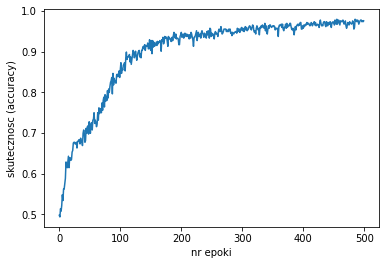

In [14]:
print(max(history.history['accuracy']))

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('nr epoki')
plt.ylabel('skutecznosc (accuracy)')

#validation_data=(X_test, y_test))

Niepoprawna predykcja, oczekiwany: [0.], otrzymano: 1
Niepoprawna predykcja, oczekiwany: [1.], otrzymano: 0
Niepoprawna predykcja, oczekiwany: [1.], otrzymano: 0
Niepoprawna predykcja, oczekiwany: [1.], otrzymano: 0
Niepoprawna predykcja, oczekiwany: [0.], otrzymano: 1
Poprawne przyporzadkowania to: 96.98795180722891 % wszystkich przyporzadkowan


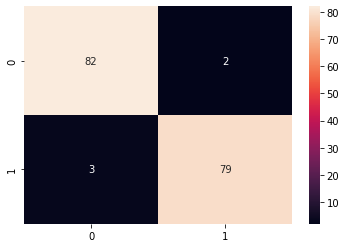

In [15]:
predictions = model.predict(X_test)

counter = 0
confusion_matrix=np.zeros((2, 2))

for i in range(len(predictions)):
  class_prediction = 0
  if predictions[i] >= 0.5:
    class_prediction = 1

  if class_prediction == y_test[i]:
    confusion_matrix[class_prediction][class_prediction] += 1
  else:
    print(f'Niepoprawna predykcja, oczekiwany: {y_test[i]}, otrzymano: {class_prediction}')
    confusion_matrix[(class_prediction + 1) % 2][class_prediction] += 1

sns.heatmap(confusion_matrix, annot=True)
print(f'Poprawne przyporzadkowania to: {(confusion_matrix[0][0] + confusion_matrix[1][1]) / len(y_test) * 100} % wszystkich przyporzadkowan')

Użycie walidacji krzyżowej (CV-5):

In [16]:
%pip install scikeras[tensorflow]

from sklearn.model_selection import cross_validate
from scikeras.wrappers import KerasClassifier

scoring = ['accuracy', 'precision', 'recall', 'f1']

model = KerasClassifier(build_fn=get_model, epochs=150)

cross_validate(estimator=model,
                               X=X,
                               y=y,
                               cv=5,
                               scoring=scoring,
                               return_train_score=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


Epoch 1/150
17/17 [==============================] - 2s 6ms/step - loss: 0.7058 - accuracy: 0.5236
Epoch 2/150
17/17 [==============================] - 0s 6ms/step - loss: 0.7310 - accuracy: 0.4915
Epoch 3/150
17/17 [==============================] - 0s 6ms/step - loss: 0.7004 - accuracy: 0.5312
Epoch 4/150
17/17 [==============================] - 0s 6ms/step - loss: 0.7158 - accuracy: 0.4820
Epoch 5/150
17/17 [==============================] - 0s 6ms/step - loss: 0.6990 - accuracy: 0.5180
Epoch 6/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6827 - accuracy: 0.5577
Epoch 7/150
17/17 [==============================] - 0s 6ms/step - loss: 0.7054 - accuracy: 0.5293
Epoch 8/150
17/17 [==============================] - 0s 5ms/step - loss: 0.7033 - accuracy: 0.5104
Epoch 9/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5293
Epoch 10/150
17/17 [==============================] - 0s 6ms/step - loss: 0.7031 - accuracy: 0.5123
Epoch 11/

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


17/17 [==============================] - 2s 6ms/step - loss: 0.6973 - accuracy: 0.5123
Epoch 2/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.5350
Epoch 3/150
17/17 [==============================] - 0s 6ms/step - loss: 0.6862 - accuracy: 0.5633
Epoch 4/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6924 - accuracy: 0.5331
Epoch 5/150
17/17 [==============================] - 0s 6ms/step - loss: 0.6818 - accuracy: 0.5614
Epoch 6/150
17/17 [==============================] - 0s 5ms/step - loss: 0.7013 - accuracy: 0.5085
Epoch 7/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6887 - accuracy: 0.5558
Epoch 8/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6954 - accuracy: 0.5009
Epoch 9/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6871 - accuracy: 0.5406
Epoch 10/150
17/17 [==============================] - 0s 6ms/step - loss: 0.6820 - accuracy: 0.5633
Epoch 11/150
17/17 [=

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


17/17 [==============================] - 2s 5ms/step - loss: 0.7524 - accuracy: 0.4925
Epoch 2/150
17/17 [==============================] - 0s 5ms/step - loss: 0.7123 - accuracy: 0.4774
Epoch 3/150
17/17 [==============================] - 0s 5ms/step - loss: 0.7054 - accuracy: 0.4962
Epoch 4/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6942 - accuracy: 0.5075
Epoch 5/150
17/17 [==============================] - 0s 6ms/step - loss: 0.6977 - accuracy: 0.5075
Epoch 6/150
17/17 [==============================] - 0s 6ms/step - loss: 0.6901 - accuracy: 0.5340
Epoch 7/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6881 - accuracy: 0.5321
Epoch 8/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6905 - accuracy: 0.5528
Epoch 9/150
17/17 [==============================] - 0s 6ms/step - loss: 0.6877 - accuracy: 0.5019
Epoch 10/150
17/17 [==============================] - 0s 6ms/step - loss: 0.6943 - accuracy: 0.5302
Epoch 11/150
17/17 [=

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


Epoch 1/150
17/17 [==============================] - 2s 6ms/step - loss: 0.6979 - accuracy: 0.5453
Epoch 2/150
17/17 [==============================] - 0s 7ms/step - loss: 0.6960 - accuracy: 0.5245
Epoch 3/150
17/17 [==============================] - 0s 5ms/step - loss: 0.7019 - accuracy: 0.4755
Epoch 4/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6940 - accuracy: 0.5415
Epoch 5/150
17/17 [==============================] - 0s 6ms/step - loss: 0.6962 - accuracy: 0.5075
Epoch 6/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6997 - accuracy: 0.5189
Epoch 7/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.4943
Epoch 8/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6974 - accuracy: 0.4830
Epoch 9/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6947 - accuracy: 0.5000
Epoch 10/150
17/17 [==============================] - 0s 6ms/step - loss: 0.6893 - accuracy: 0.5377
Epoch 11/

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


17/17 [==============================] - 2s 6ms/step - loss: 0.7119 - accuracy: 0.4906
Epoch 2/150
17/17 [==============================] - 0s 6ms/step - loss: 0.7066 - accuracy: 0.4962
Epoch 3/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6976 - accuracy: 0.5094
Epoch 4/150
17/17 [==============================] - 0s 6ms/step - loss: 0.6967 - accuracy: 0.5094
Epoch 5/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6884 - accuracy: 0.5283
Epoch 6/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6954 - accuracy: 0.5132
Epoch 7/150
17/17 [==============================] - 0s 6ms/step - loss: 0.6999 - accuracy: 0.4887
Epoch 8/150
17/17 [==============================] - 0s 6ms/step - loss: 0.7001 - accuracy: 0.5038
Epoch 9/150
17/17 [==============================] - 0s 6ms/step - loss: 0.6876 - accuracy: 0.5302
Epoch 10/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6973 - accuracy: 0.5245
Epoch 11/150
17/17 [=

{'fit_time': array([17.94030452, 17.5415144 , 17.9474926 , 19.66930795, 18.14635611]),
 'score_time': array([0.32810688, 0.32140017, 0.30788183, 0.29826427, 0.30125499]),
 'test_accuracy': array([0.72932331, 0.86466165, 0.90151515, 0.84848485, 0.82575758]),
 'test_f1': array([0.72307692, 0.86153846, 0.90076336, 0.84375   , 0.82442748]),
 'test_precision': array([0.734375  , 0.875     , 0.90769231, 0.85714286, 0.81818182]),
 'test_recall': array([0.71212121, 0.84848485, 0.89393939, 0.83076923, 0.83076923]),
 'train_accuracy': array([0.75992439, 0.85255198, 0.91509434, 0.87358491, 0.8754717 ]),
 'train_f1': array([0.76950998, 0.8452381 , 0.91295938, 0.87334594, 0.87109375]),
 'train_precision': array([0.73356401, 0.88016529, 0.9254902 , 0.86842105, 0.89558233]),
 'train_recall': array([0.80916031, 0.8129771 , 0.90076336, 0.878327  , 0.84790875])}

# Dalszy plan działania (W postaci checklisty

1. Wczytanie i przetwarzanie danych - ✅

2. Utworzenie oczekiwanych statystyk:
  - Średnie,
  - Mediany,
  - Odchylenia,
  - Korelacje,
  - Wizualizacje

3. Normalizacja danych

4. Cross-walidacja (CV5)

5. Stworzenie architektury składającej się z rekurencyjnych sieci neuronowych służącej do klasyfikacji i jej uczenie

6. Testowanie naszych rozwiązań (manualnie i w miarę możliwości automatycznie)

7. Porównanie wyników w zależności od zmian w topologii

8. Stworzenie sprawozdania na temat naszego rozwiązania

9. Stworzenie prezentacji opisującej nasze rozwiązanie oraz przedstawiającej napotkane problemy
